In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [6]:
mnist.train.images.shape

(55000, 784)

# Data Visualization

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
mnist.train.images[0].shape

(784,)

In [9]:
single_image = mnist.train.images[0].reshape((28, 28))

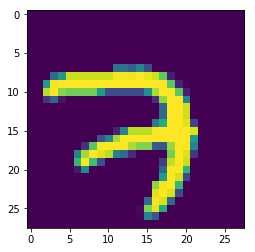

In [10]:
plt.imshow(single_image)

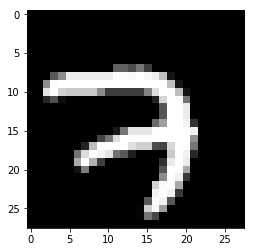

In [11]:
plt.imshow(single_image, cmap = 'gist_gray')

# Create Model

In [12]:
x = tf.placeholder(tf.float32, shape=[None, 784])

In [13]:
W = tf.Variable(tf.zeros([784, 10]))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
b = tf.Variable(tf.zeros(10))

In [15]:
y = tf.matmul(x, W) + b

In [16]:
y_true = tf.placeholder(tf.float32, shape=[None, 10])

# Loss Function and Optimizer

In [17]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = optimizer.minimize(cross_entropy)

# Create Session

In [19]:
init = tf.global_variables_initializer()

In [20]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x: batch_x, y_true: batch_y})
    
    matches = tf.equal(tf.argmax(y, axis=1), tf.argmax(y_true, axis=1))
    acc = tf.reduce_mean(tf.cast(matches, tf.float32))
    
    print(sess.run(acc, feed_dict={x: mnist.test.images, y_true: mnist.test.labels}))

0.9161
